In [1]:
from src.eda_vector import *
from src.lda_model import *
from src.model import *
from src.classifier import *

In [2]:
'''
NOTE: No EDA appears in this notebook. See Untitled-Copy2 for EDA
--> EDA methods also availible in EDA_vec class
'''

'\nNOTE: No EDA appears in this notebook. See Untitled-Copy2 for EDA\n--> EDA methods also availible in EDA_vec class\n'

In [3]:
# train, test, split
X_train, X_test, y_train, y_test = get_data(num_samples=10000)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [4]:
# vectorizing process
custom_stops = ['https', 'rt', 'co', 'amp', 'via', 'go', 'get', 'said', 'say', 'news', 'new', 'make', 'want', 
                'trump', 'clinton', 'donald', 'donald trump', 'donaldtrump', 'says', 'hillary', 'hillaryclinton',
                'hillary clinton', 'realdonaldtrump', 'would', 'let', 'video', 'like']

# fit vectorizer, add stop words, return vocab
vectors = EDA_vec(X_train, y_train)
vectors.add_stop_words(custom_stops)
vocab, fit_mat = vectors.vectorize(min_df=0.0001)

# transform traininng and testing data 
matrix = fit_mat.transform(X_train)
matrix_test = fit_mat.transform(X_test)

In [5]:
matrix.shape, matrix_test.shape

((7500, 70830), (2500, 70830))

In [6]:
# fit LDA model on training data
lda = LDA_model(topics=5)
lda.fit(matrix, y_train, vocab)
lda.phi() # to evaluate coherence score
theta = lda.theta()

# get test theta for random forest evaluation
theta_test = lda.test_theta(matrix_test)

In [7]:
# random forest 
forest = RandForest(n_estimators=100, max_depth=50, max_leaf=50, max_features=theta.shape[1])
forest.fit(theta, y_train)
probas, y_hat = forest.predict(theta_test)
forest.score(y_test, y_hat)

In [8]:
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')

accuracy = 0.92
oob = 0.9197333333333333
recall = 1.0
precision = 0.92


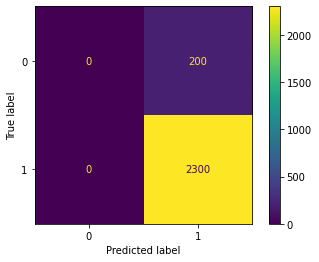

In [9]:
forest.plot_confusion()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, precision_score, plot_confusion_matrix

# Random Forest, X = theta, y = y_train
def eval_random_forest(X, y, folds=10, n_estimators=100, max_depth=5, max_leaf=None):
    kf = KFold(n_splits=folds, shuffle=True)
    accuracy = []
    oob = []
    iters = 0
    
    for train, test in kf.split(X):
        
        forest = RandForest(n_estimators=n_estimators, max_depth=max_depth, max_leaf=max_leaf, 
                            max_features=theta.shape[1])
        forest.fit(X.iloc[train], y.iloc[train])
        accuracy.append(forest.score(X.iloc[test], y.iloc[test]))
        oob.append(forest.oob_score_)
        
        print(iters)
        iters += 1
    
    return np.mean(accuracy), np.mean(oob), forest